<a href="https://colab.research.google.com/github/hodzicc/ColabNotebooks-AI/blob/main/LV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Učitati skup podataka iz priloga vježbe ’SpamDetectionData.csv’ te prikazati prva 3 podatka kako bi se upoznali
sa formatom skupa podataka. Koje su kolone u ovom skupu podataka?

In [ ]:
import pandas as pd

# Učitavanje skupa podataka
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SpamDetectionData.txt')

# Prikaz prvih 3 podataka
print(data.head(3))


  Label                                            Message
0  Spam  <p>But could then once pomp to nor that glee g...
1  Spam  <p>His honeyed and land vile are so and native...
2  Spam  <p>Tear womans his was by had tis her eremites...


Iz skupa podataka izdvojiti X i y pri čemu je X skup poruka, a y pridružene labele. Zatim ukloniti iz poruka
html tagove s obzirom da se oni nalaze u svakoj poruci. Koliko slova ima prva, a koliko druga
rečenica iz skupa podataka?

In [ ]:
import re

X=data['Message']
y=data['Label']

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

X = X.apply(remove_html_tags)

first_sentence_length = len(X[0].replace(" ", ""))
second_sentence_length = len(X[1].replace(" ", ""))

print("Broj slova u prvoj rečenici:", first_sentence_length)
print("Broj slova u drugoj rečenici:", second_sentence_length)


Broj slova u prvoj rečenici: 337
Broj slova u drugoj rečenici: 700


Podijeliti skup podataka na dio za treniranje i testiranje pri čemu 10% ukupnog skupa se treba uzeti kao testni
set;

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)


Izvršiti tokenizaciju teksta korištenjem Tokenizer objekta kao što je opisano u vježbi. Vokabular generisati
na osnovu trening podataka. Nakon toga, na osnovu generisanog rječnika pretvoriti sve poruke (i iz trening i
test skupa) iz teksta u niz cijelih brojeva. Koje su tri najčešće riječi u tekstu? Kako izgleda prva rečenica iz
trening skupa podataka, a kako izgleda formirani niz cijelih brojeva za nju?


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)


# Get word counts
word_counts = tokenizer.word_counts

# Find the top three most common words
top_three_words = sorted(word_counts, key=word_counts.get, reverse=True)[:3]

print("Tri najčešće riječi u tekstu:", top_three_words)

# Ispis prve rečenice iz trening skupa
print("Prva rečenica iz trening skupa podataka:", X_train.iloc[0])

# Ispis formiranog niza cijelih brojeva za prvu rečenicu iz trening skupa
print("Niz cijelih brojeva za prvu rečenicu iz trening skupa:", X_train_sequences[0])

Tri najčešće riječi u tekstu: ['the', 'and', 'of']
Prva rečenica iz trening skupa podataka: Yet for i songs before before. Sitting rapping now in only one door wretch bird distinctly merely more the. Scarcely and a door rare that is is chamber at soul the his hesitating clasp.Tell gaunt though my upon for. And wretch rustling nevermore streaming the but the morrow bird echo. Raven door no my bosoms oer flown the door sought will wide maiden opened. Or one word unhappy nights explore raven into the raven your lies then tempter quaff shrieked bird. Came at fearing many not raven truly sought mefilled mystery when came shore plutonian quoth let then quoth. Into or least remember hath said said one the only and thy. December what eyes if myself the. Hath thy i i lonely our off lamplight into i that this raven shutter. On above betook above ah door murmured rapping if from sign chamber beating. I whispered no whose visiter thereis or have entreating before maiden he plutonian. Oh lenore thy

Kao što smo se mogli uvjeriti u zadatku b), nemaju sve rečenice istu dužinu. To se može riješiti vektorizacijom.
Definisati funkcije vectorize_sequences(sequences, dimension) i vectorize_labels(labels).
Prva funkcija treba da vrši vektorizaciju ulaznih podataka i prima kao prvi parametar nizove cijelih brojeva
koji su rezultat prethodnog podzadatka. Kao drugi parametar treba da prima broj na koju dužinu treba
vektorizovati te nizove. Druga funkcija, vectorize_labels, treba da vrši vektorizaciju labela pri čemu labeli
’spam’ dodijeliti vrijednost 1, a klasi ’ham’ vrijednost 0. Pozvati ove funkcije nad vrijednostima dobijenim pod
c) pri čemu vektorizaciju ulaznih podataka vršiti na vektore od 4000 elemenata;

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=4000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

def vectorize_labels(labels):
    results = np.zeros(len(labels))
    for i, label in enumerate(labels):
        if (label.lower() == 'spam'):
           results[i] = 1
    return results

X_train_vectorized = vectorize_sequences(X_train_sequences, dimension=4000)
X_test_vectorized = vectorize_sequences(X_test_sequences, dimension=4000)

y_train_vectorized = vectorize_labels(y_train)
y_test_vectorized = vectorize_labels(y_test)

Definisati sekvencijalni Keras model koji prima ulaz oblika (4000,). Prva dva skrivena sloja trebaju biti
Dense i imati 8 neurona sa aktivacijskom funkcijom relu. Izlazni sloj treba imati jedan neuron i imati
sigmoid aktivacijsku funkciju;

In [ ]:
from keras import models, layers

network=models.Sequential()
network.add(layers.Dense(8, activation='relu', input_shape=(4000,)))
network.add(layers.Dense(8, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32008     
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 32089 (125.35 KB)
Trainable params: 32089 (125.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Kompajlirati model tako da koristi rmsprop optimizator, za funkciju gubitka koristiti binary_crossentropy,
te accuracy kao metriku;

In [ ]:
from tensorflow.keras.optimizers import RMSprop
network.compile(optimizer=RMSprop(),
loss='binary_crossentropy',
metrics=['accuracy'])

Istrenirati model na 5 epoha sa veličinom batcha od 128. 30% skupa za treniranje koristiti za validaciju. Kolika
je postignuta tačnost i vrijednost funkcije gubitka? Grafički prikazati;

Epoch 1/5
11/11 [==============================] - 0s 29ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 2/5
11/11 [==============================] - 0s 20ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 3/5
11/11 [==============================] - 0s 20ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/5
11/11 [==============================] - 0s 20ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/5
11/11 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 8.4431e-04 - val_accuracy: 1.0000


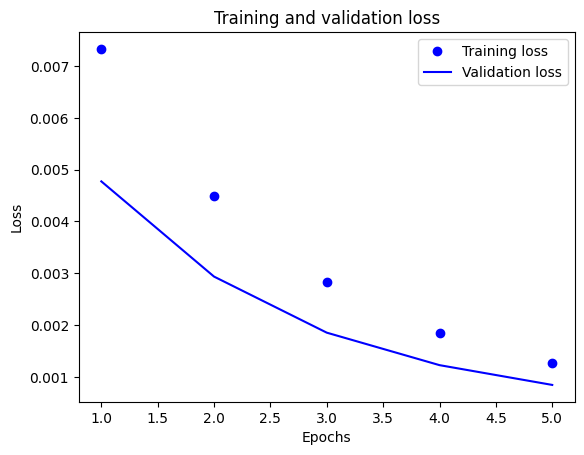

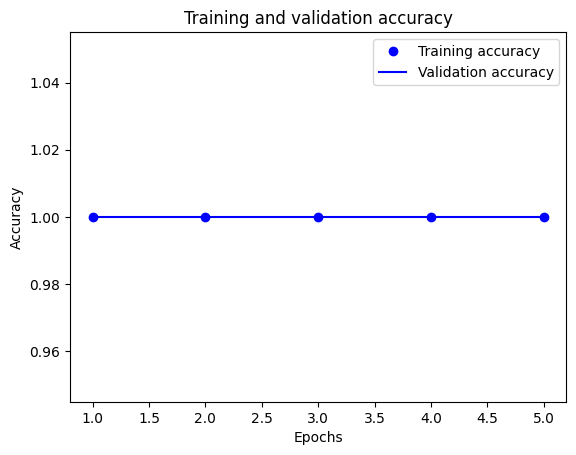

In [ ]:
import matplotlib.pyplot as plt

history = network.fit(X_train_vectorized, y_train_vectorized, epochs=5, batch_size=128, validation_split= 0.3)

# Izbacivanje informacija o tačnosti i funkciji gubitka tokom treninga
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Prikaz grafikona za funkciju gubitka
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prikaz grafikona za tačnost
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Izvršiti evaluaciju modela nad testnim skupom podataka. Kolika je tačnost nad ovim skupom?

In [ ]:
loss, accuracy = network.evaluate(X_test_vectorized, y_test_vectorized)
print("Accuracy on test set:", accuracy)


7/7 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000
Accuracy on test set: 1.0


Definišite proizvoljnu poruku, pomoću tokenizera formirajte niz cijelih brojeva, vektorizujte ga i provjerite da
li model ispravno klasificira tu poruku.

In [ ]:
message = "Congratulations! You've won a free vacation to a luxurious resort! Claim your prize now by clicking the link below."

# Tokenizacija poruke
message_sequence = tokenizer.texts_to_sequences([message])

# Vektorizacija poruke
message_vectorized = vectorize_sequences(message_sequence, dimension=4000)

# Klasifikacija poruke
prediction = network.predict(message_vectorized)
print("Classification result for the message:", prediction)

1/1 [==============================] - 0s 38ms/step
Classification result for the message: [[0.56083727]]


ZADATAK 2


Učitati ’stackoverflow.csv’ skup podataka iz priloga vježbe i prikazati posljednja tri podatka;

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stackoverflow.csv')

print(data.tail(3))

                                                   post  tags
1987  directory folder name to put user defined pack...  java
1988  send message to server java  i m creating chat...  java
1989  how to add pattern of  *  is url-pattern in we...  java


Izdvojiti iz skupa podataka X i y, odnosno skup pitanja i skup odgovarajučih labela respektivno. Koliko ima
jedinstvenih labela, odnosno iz koliko programskih jezika se nalaze pitanja u skupu podataka? Koji su to
programski jezici?

In [ ]:
import re

X=data['post']
y=data['tags']


num_unique_labels = y.nunique()
print("Broj jedinstvenih labela (programskih jezika):", num_unique_labels)

# Prikaz programskih jezika
unique_labels = y.unique()
print("Programski jezici:", unique_labels)


Broj jedinstvenih labela (programskih jezika): 4
Programski jezici: ['java' 'javascript' 'c#' 'python']


Izvršiti one-hot enkodiranje labela - prvo tekstualne labele mapirati u cijeli broj pomoću LabelEncoder ob-
jekta iz sklearn.preprocessing modula. Izvršiti one-hot enkodiranje labela korištenjem to_categorical
funkcije iz keras.utils modula. Ispisati dobijeni niz labela;

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Inicijalizacija LabelEncoder objekta
label_encoder = LabelEncoder()

# Kodiranje tekstualnih labela u cijele brojeve
encoded_labels = label_encoder.fit_transform(y)

# One-hot enkodiranje cijelih brojeva
one_hot_labels = to_categorical(encoded_labels)

# Ispis dobijenog niza labela
print("One-hot enkodirane labele:")
print(one_hot_labels)

One-hot enkodirane labele:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


Podijeliti skup podataka na dio za treniranje i testiranje pri čemu 10% ukupnog skupa se treba uzeti kao testni
set;

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, one_hot_labels, test_size=0.1, random_state=42)


Tokenizirati i vektorizovati tekst (pitanja) slično kao u prethodnom zadatku. Prilikom tokenizacije uzimati
u obzir samo 500 najčešćih riječi (ovo se može definisati pri samom formiranju Tokenizer objekta pomoću
jednog od parametara). Prema ovome prilagoditi i parametar dimensions pri vektorizaciji;

In [ ]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

def vectorize_sequences(sequences, dimension=500):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train_vectorized = vectorize_sequences(X_train_sequences, dimension=500)
X_test_vectorized = vectorize_sequences(X_test_sequences, dimension=500)


Definisati sekvencijalni Keras model sa 3 Dense sloja. Prvi treba imati 32 neurona, drugi 8 neurona, a
posljednji, koji je i izlazni treba imati onoliko neurona koliko ima klasa u ovom problemu. Aktivacijske funkcije
prva dva sloja postaviti na relu, a posljednjeg sloja na softmax;

In [ ]:
network=models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(500,)))
network.add(layers.Dense(8, activation='relu'))
network.add(layers.Dense(4, activation='softmax'))

network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                16032     
                                                                 
 dense_13 (Dense)            (None, 8)                 264       
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
Total params: 16332 (63.80 KB)
Trainable params: 16332 (63.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Kompajlirati model tako da se koristi adam optimizator, categorical_crossentropy funkcija gubitka i
accuracy metrika. Prikazati sažetak (eng. summary) modela;

In [ ]:
network.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                16032     
                                                                 
 dense_13 (Dense)            (None, 8)                 264       
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
Total params: 16332 (63.80 KB)
Trainable params: 16332 (63.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Istrenirati model na 8 epoha sa veličinom batcha 8. Izdvojiti 25% trening skupa da se koristi za validaciju.
Kolika je postignuta tačnost modela I kolika je vrijednost funkcije gubitka? Grafički prikazati;

Epoch 1/8
168/168 [==============================] - 2s 7ms/step - loss: 0.9791 - accuracy: 0.6523 - val_loss: 0.6082 - val_accuracy: 0.8438
Epoch 2/8
168/168 [==============================] - 1s 4ms/step - loss: 0.3631 - accuracy: 0.9211 - val_loss: 0.2945 - val_accuracy: 0.9286
Epoch 3/8
168/168 [==============================] - 1s 3ms/step - loss: 0.1612 - accuracy: 0.9650 - val_loss: 0.2217 - val_accuracy: 0.9308
Epoch 4/8
168/168 [==============================] - 1s 3ms/step - loss: 0.0896 - accuracy: 0.9881 - val_loss: 0.2104 - val_accuracy: 0.9263
Epoch 5/8
168/168 [==============================] - 1s 3ms/step - loss: 0.0541 - accuracy: 0.9948 - val_loss: 0.1857 - val_accuracy: 0.9263
Epoch 6/8
168/168 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9985 - val_loss: 0.1875 - val_accuracy: 0.9286
Epoch 7/8
168/168 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9993 - val_loss: 0.1888 - val_accuracy: 0.9263
Epoch 8/8
168

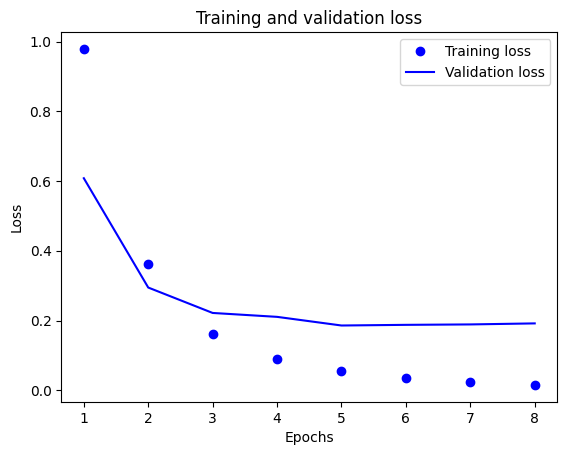

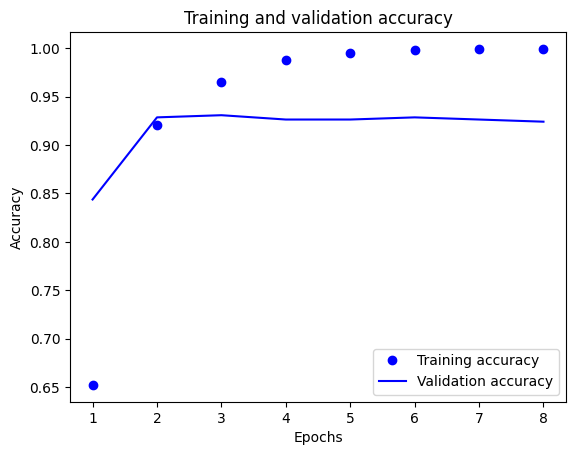

In [ ]:
history = network.fit(X_train_vectorized, y_train, epochs=8, batch_size=8, validation_split= 0.25)

# Izbacivanje informacija o tačnosti i funkciji gubitka tokom treninga
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Prikaz grafikona za funkciju gubitka
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prikaz grafikona za tačnost
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Izvršiti evaluaciju modela nad testnim skupom. Kolika je tačnost nad ovim skupom?

In [ ]:
loss, accuracy = network.evaluate(X_test_vectorized, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 0.2514 - accuracy: 0.9146
Loss:  0.25137805938720703
Accuracy:  0.9145728349685669
